# Lecture 7: Supervised Learning - Decision Tree, Cross-validation and Grid Search
Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Decision Tree Classification
- Cross-Validation
- Grid Search

#### References:
[1] Decision and Classification Trees, Clearly Explained!!! https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer
<br>[2] StatQuest: Decision Trees: https://www.youtube.com/watch?v=7VeUPuFGJHk&t=302s&ab_channel=StatQuestwithJoshStarmer
<br>[3] StatQuest: Decision Trees, Part 2 - Feature Selection and Missing Data: https://www.youtube.com/watch?v=wpNl-JwwplA&ab_channel=StatQuestwithJoshStarmer
<br>[4] scikit-learn decision tree classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>[5] Decision Trees in Python from Start to Finish: https://www.youtube.com/watch?v=q90UDEgYqeI&ab_channel=StatQuestwithJoshStarmer
<br> [6] Plotting a tree diagram https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
<br>[7] Plotting confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
<br>[8] Regression Trees, Clearly Explained!!! https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer
<br>[9] Machine Learning Fundamentals: Cross Validation: https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer
<br>[10] Machine Learning Tutorial Python - 16: Hyper parameter Tuning (GridSearchCV): https://www.youtube.com/watch?v=HdlDYng8g9s&ab_channel=codebasics

- In the tree-based models we can use both numeric data and categorical data
- A numeirc feature can be used multiples times during the node splitting and the threshold can also be different.
- The very top of the tree is called the Root Node
- Internal nodes, branches
- Leaf nodes: leaves have arrows pointing to them. But there are no arrows pointing away from them.
- How do you choose the root node?
- What is an impure node? When a leaf contains a mixture of all classes.
- How do you quantify the impurity of the leaves? 1. Gini Impurity, 2. Entropy or Information Gain
- Gini Impurity for a leaf = 1 - (probability of Yes)^2 - (Probability of No)^2
- Total Gini Impurity = weighted average of Gini Impurities for the leaves


**age:** age in years
<br>**sex:** sex (1 = male; 0 = female)
<br>**cp:** chest pain type
- 1 = typical angina
- 2 = atypical angina
- 3 = non-anginal pain
- 4 = asymptomatic

<br>**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
<br>**chol:** serum cholestoral in mg/dl
<br>**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<br>**restecg:** resting electrocardiographic results
- 0 = normal
- 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

<br>**thalach:** maximum heart rate achieved
<br>**exang:** exercise induced angina (1 = yes; 0 = no)
<br>**oldpeak:** ST depression induced by exercise relative to rest
<br>**slope:** the slope of the peak exercise ST segment
- 1 = upsloping
- 2 = flat
- 3 = downsloping

<br>**ca:** number of major vessels (0-3) colored by flourosopy
<br>**thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
<br>**hd:** heart disease 

In [348]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

#### Loading heart disease data

In [349]:
# dataset source: https://archive.ics.uci.edu/ml/datasets/heart+disease
df = pd.read_csv("processed.cleveland.data", header=None, na_values="?")
df = df.dropna()
display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(297, 14)


#### Rename the column names

In [350]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'hd']

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Checking categorical variables

In [351]:
df['cp'].value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

In [352]:
df['restecg'].value_counts()

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

#### Checking for missing values and data types

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


#### Target variable: 'hd'

In [354]:
print(df['hd'].value_counts())

0    160
1     54
3     35
2     35
4     13
Name: hd, dtype: int64


In [355]:
df[df['hd'] > 1] = 1

print(df['hd'].value_counts())

0    160
1    137
Name: hd, dtype: int64


In [356]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,38.750842,0.730640,2.390572,94.101010,176.754209,0.367003,0.942761,112.252525,0.437710,0.787879,1.336700,0.562290,3.286195,0.461279
std,24.818501,0.444376,1.197821,59.822795,117.816094,0.482801,0.846349,71.612180,0.496942,0.742977,0.546271,0.675582,2.083294,0.499340
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,48.000000,1.000000,2.000000,120.000000,218.000000,0.000000,1.000000,149.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,3.000000,135.000000,258.000000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


#### Create feature set and target

In [357]:
X = df.drop('hd', axis=1)
y = df[['hd']]

print(X.shape, y.shape)

(297, 13) (297, 1)


#### One-hot encoding

In [358]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

display(X.head())
print(X.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


#### Split the dataset intro train and test set

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


#### Decision Tree classifier, no grid search

In [360]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

#### Tree Diagram

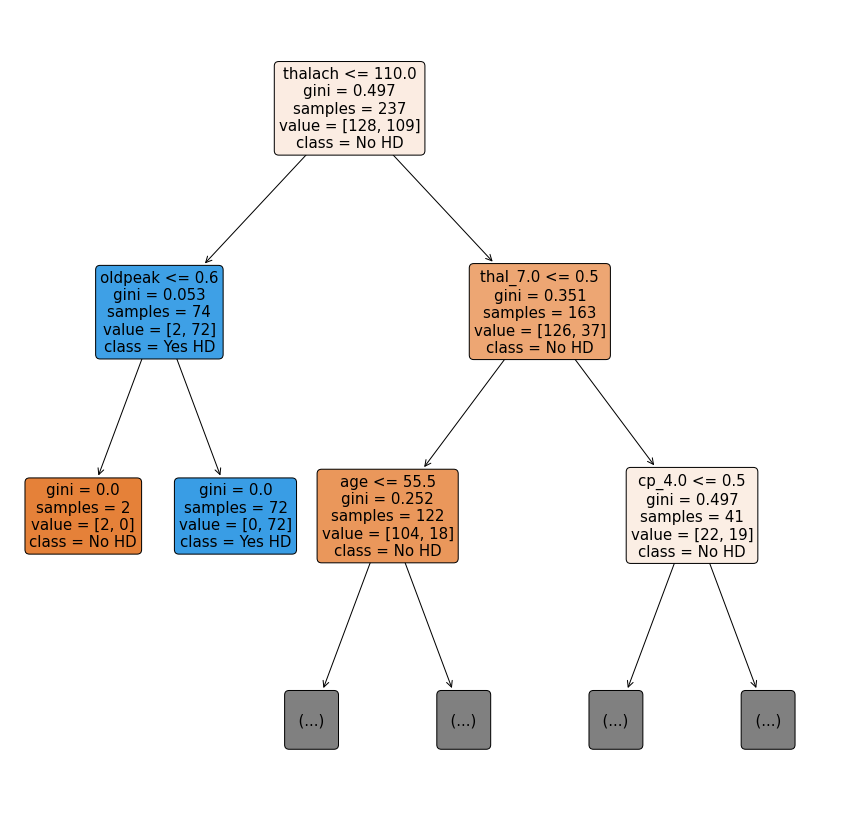

In [361]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

#### Model Performance Evaluation

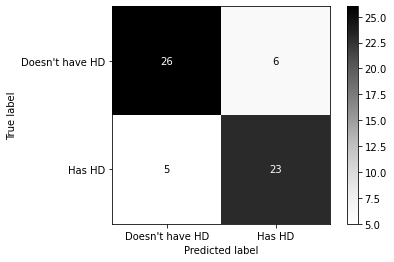

In [362]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Greys')
plt.show()

In [363]:
y_pred_DT = model_DT.predict(X_test)

Accuracy:  0.8166666666666667
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



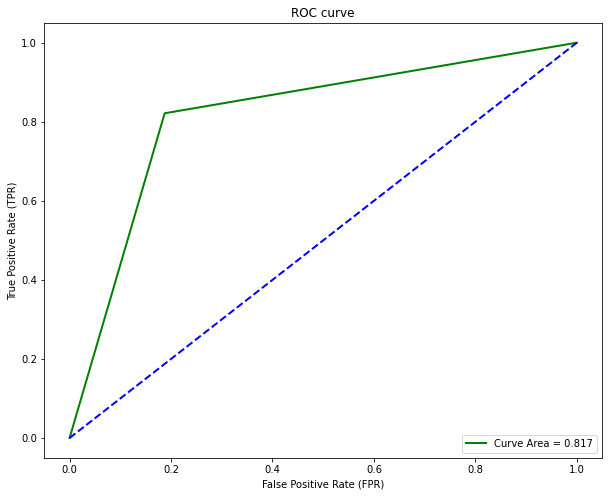

In [364]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Grid Search and cross-validation

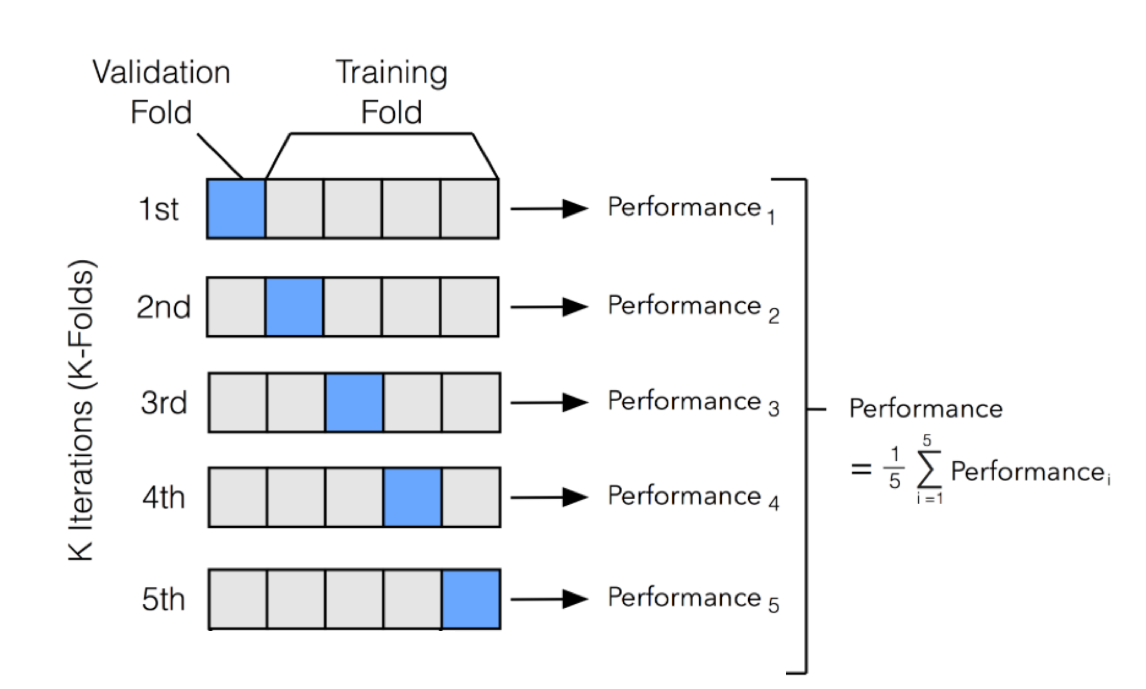
image source: https://www.analyticsvidhya.com/blog/2021/05/importance-of-cross-validation-are-evaluation-metrics-enough/

In [365]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [366]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### Best hyperparameters in the grid search

In [367]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [368]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,entropy,4,0.937500,0.875000,0.829787,0.723404,0.702128,0.813564,0.089381,1
9,entropy,7,0.833333,0.812500,0.872340,0.744681,0.787234,0.810018,0.042946,2
7,entropy,5,0.875000,0.791667,0.872340,0.787234,0.723404,0.809929,0.057384,3
0,gini,3,0.958333,0.875000,0.829787,0.702128,0.659574,0.804965,0.110233,4
8,entropy,6,0.812500,0.833333,0.829787,0.765957,0.765957,0.801507,0.029870,5
2,gini,5,0.875000,0.791667,0.787234,0.787234,0.702128,0.788652,0.054691,6
5,entropy,3,0.937500,0.812500,0.829787,0.702128,0.659574,0.788298,0.098553,7
1,gini,4,0.895833,0.812500,0.808511,0.680851,0.702128,0.779965,0.078970,8
3,gini,6,0.791667,0.708333,0.808511,0.765957,0.680851,0.751064,0.048839,9
4,gini,7,0.770833,0.708333,0.765957,0.744681,0.744681,0.746897,0.022060,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Model performance evaluation with the best found model in grid search and cross-validation

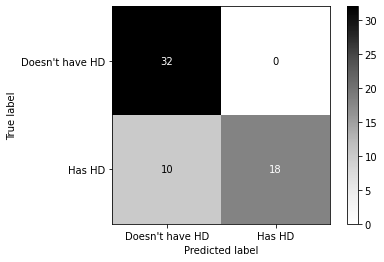

In [369]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Greys')
plt.show()

In [370]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[32  0]
 [10 18]]
Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       1.00      0.64      0.78        28

    accuracy                           0.83        60
   macro avg       0.88      0.82      0.82        60
weighted avg       0.87      0.83      0.83        60



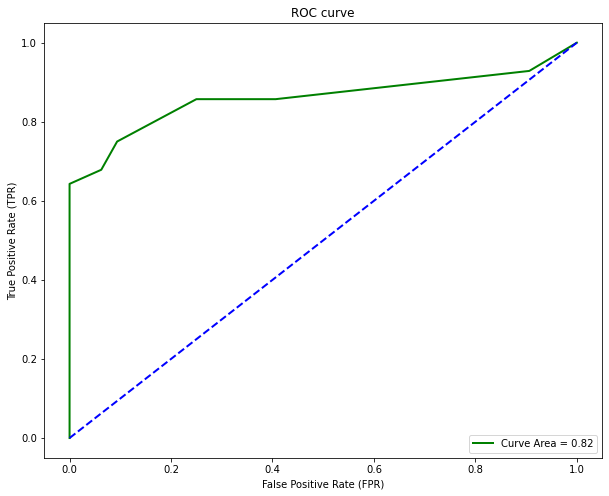

In [371]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [372]:
# y_test['pred'] = y_pred
# y_test['probability'] = grid_result.predict_proba(X_test)[:,1]

# display(y_test.head(20))